## MEAM 5170 Final Project Group 17 
Shreya Lanjewar, Nikola Obradovic, Emily Paul

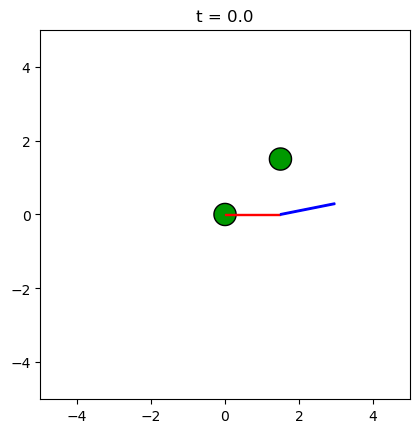

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()

bot = Acrobot(plant)
env = Environment(-5, 5, -5, 5, 0.3)
env.generate_single_hold(bot.l1 + bot.l2)
controller = ZeroController(bot)


x, u, t = simulate_acrobot(np.array([np.pi/2, np.pi/16, 0, 0]), 10, bot,
                           controller)

viz = AcrobotVisualizer(bot, env)
viz.draw(x[0,:], t[0])
# ani = create_animation(viz,x,t)
# plt.close()
# HTML(ani.to_jshtml())

# fig1 = plt.figure(figsize=(4,3))
# plt.plot(t, x[:,0], label='x_0')
# plt.plot(t, x[:,1], label='x_1')
# plt.plot(t, x[:,2], label='x_2')
# plt.plot(t, x[:,3], label='x_3')
# plt.legend()


In [14]:
import matplotlib.animation as animation

f = r"animation.gif" 
writergif = animation.PillowWriter(fps=50) 
ani.save(f, writer=writergif)